# Era5 Dataset

Here, we will use the ERA5 python API to gain access re-analysis data for pre-training the diffusion model. Here, we will use the analysis-ready and cloud optimized version of ERA5 available on [Google Cloud Platform](https://github.com/google-research/arco-era5?tab=readme-ov-file).

In [199]:

import torch
import matplotlib.pyplot as plt
from notebook_setup import device
import numpy as np
# change device to whatever you want to use
device = torch.device('cuda:0')
%load_ext autoreload
%autoreload 2

torch.manual_seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0.25° Pressure and Surface Level Data

This is a super-set of the data used in NeuralGCMs and GraphCast.

In [287]:
from pyproj import Proj, Transformer
import numpy as np

def lat_lon_to_planar_pyproj(latitudes, longitudes, center_lat, center_lon):
    # Define a custom projection centered on the given latitude and longitude using the azimuthal equidistant projection
    projection = Proj(proj="aeqd", lat_0=center_lat, lon_0=center_lon, datum="WGS84")

    # Use the transformer to convert from geographic (lat, lon) to planar (x, y)
    transformer = Transformer.from_proj(proj_from="epsg:4326", proj_to=projection)

    # Transform latitudes and longitudes
    x, y = transformer.transform(latitudes, longitudes)
    
    return x, y

# Example usage
# latitudes = np.array([-30, 0, 30])  # Example latitudes
# longitudes = np.array([90, 90, 90])  # Example longitudes, in range 0-360
# center_lat = 0  # Center latitude
# center_lon = 90  # Center longitude

# x, y = lat_lon_to_planar_pyproj(latitudes, longitudes, center_lat, center_lon)

# print("Planar X coordinates:", x)
# print("Planar Y coordinates:", y)

# Example usage
latitudes = np.array([-90, -89, -30, -0.25, 0, 30, 90])  # Example latitudes
longitudes = np.array([0, 90, 175, 180])  # Example longitudes, in range 0-360
center_lat = 0  # Center latitude
center_lon = 0  # Center longitude

_, x = lat_lon_to_planar_pyproj(latitudes, center_lon * np.ones(len(latitudes)), center_lat, center_lon)
_, y = lat_lon_to_planar_pyproj(center_lat * np.ones(len(longitudes)), longitudes, center_lat, center_lon)

print("Planar X coordinates:", x)
print("Planar Y coordinates:", y)

Planar X coordinates: [-10001965.72931272  -9890271.86439852  -3320113.39794038
    -27643.570717           0.           3320113.39794038
  10001965.72931272]
Planar Y coordinates: [0.00000000e+00 6.13471761e-10 1.19286176e-09 2.00039315e+07]


In [431]:
%autoreload 2
from data.climate.regional_dataset import ERA5RegionalDataset
from datetime import timedelta

dset_temp = ERA5RegionalDataset(
    NS_length=6000000,
    EW_length=6000000,
    total_count=100,
    timedelta_size=timedelta(hours=0.77),
    attribute='2m_temperature',
)
dset_wind = ERA5RegionalDataset(
    NS_length=6000000,
    EW_length=6000000,
    total_count=100,
    timedelta_size=timedelta(hours=0.77),
    attribute='ocean_surface_stress_equivalent_10m_neutral_wind_speed',
)

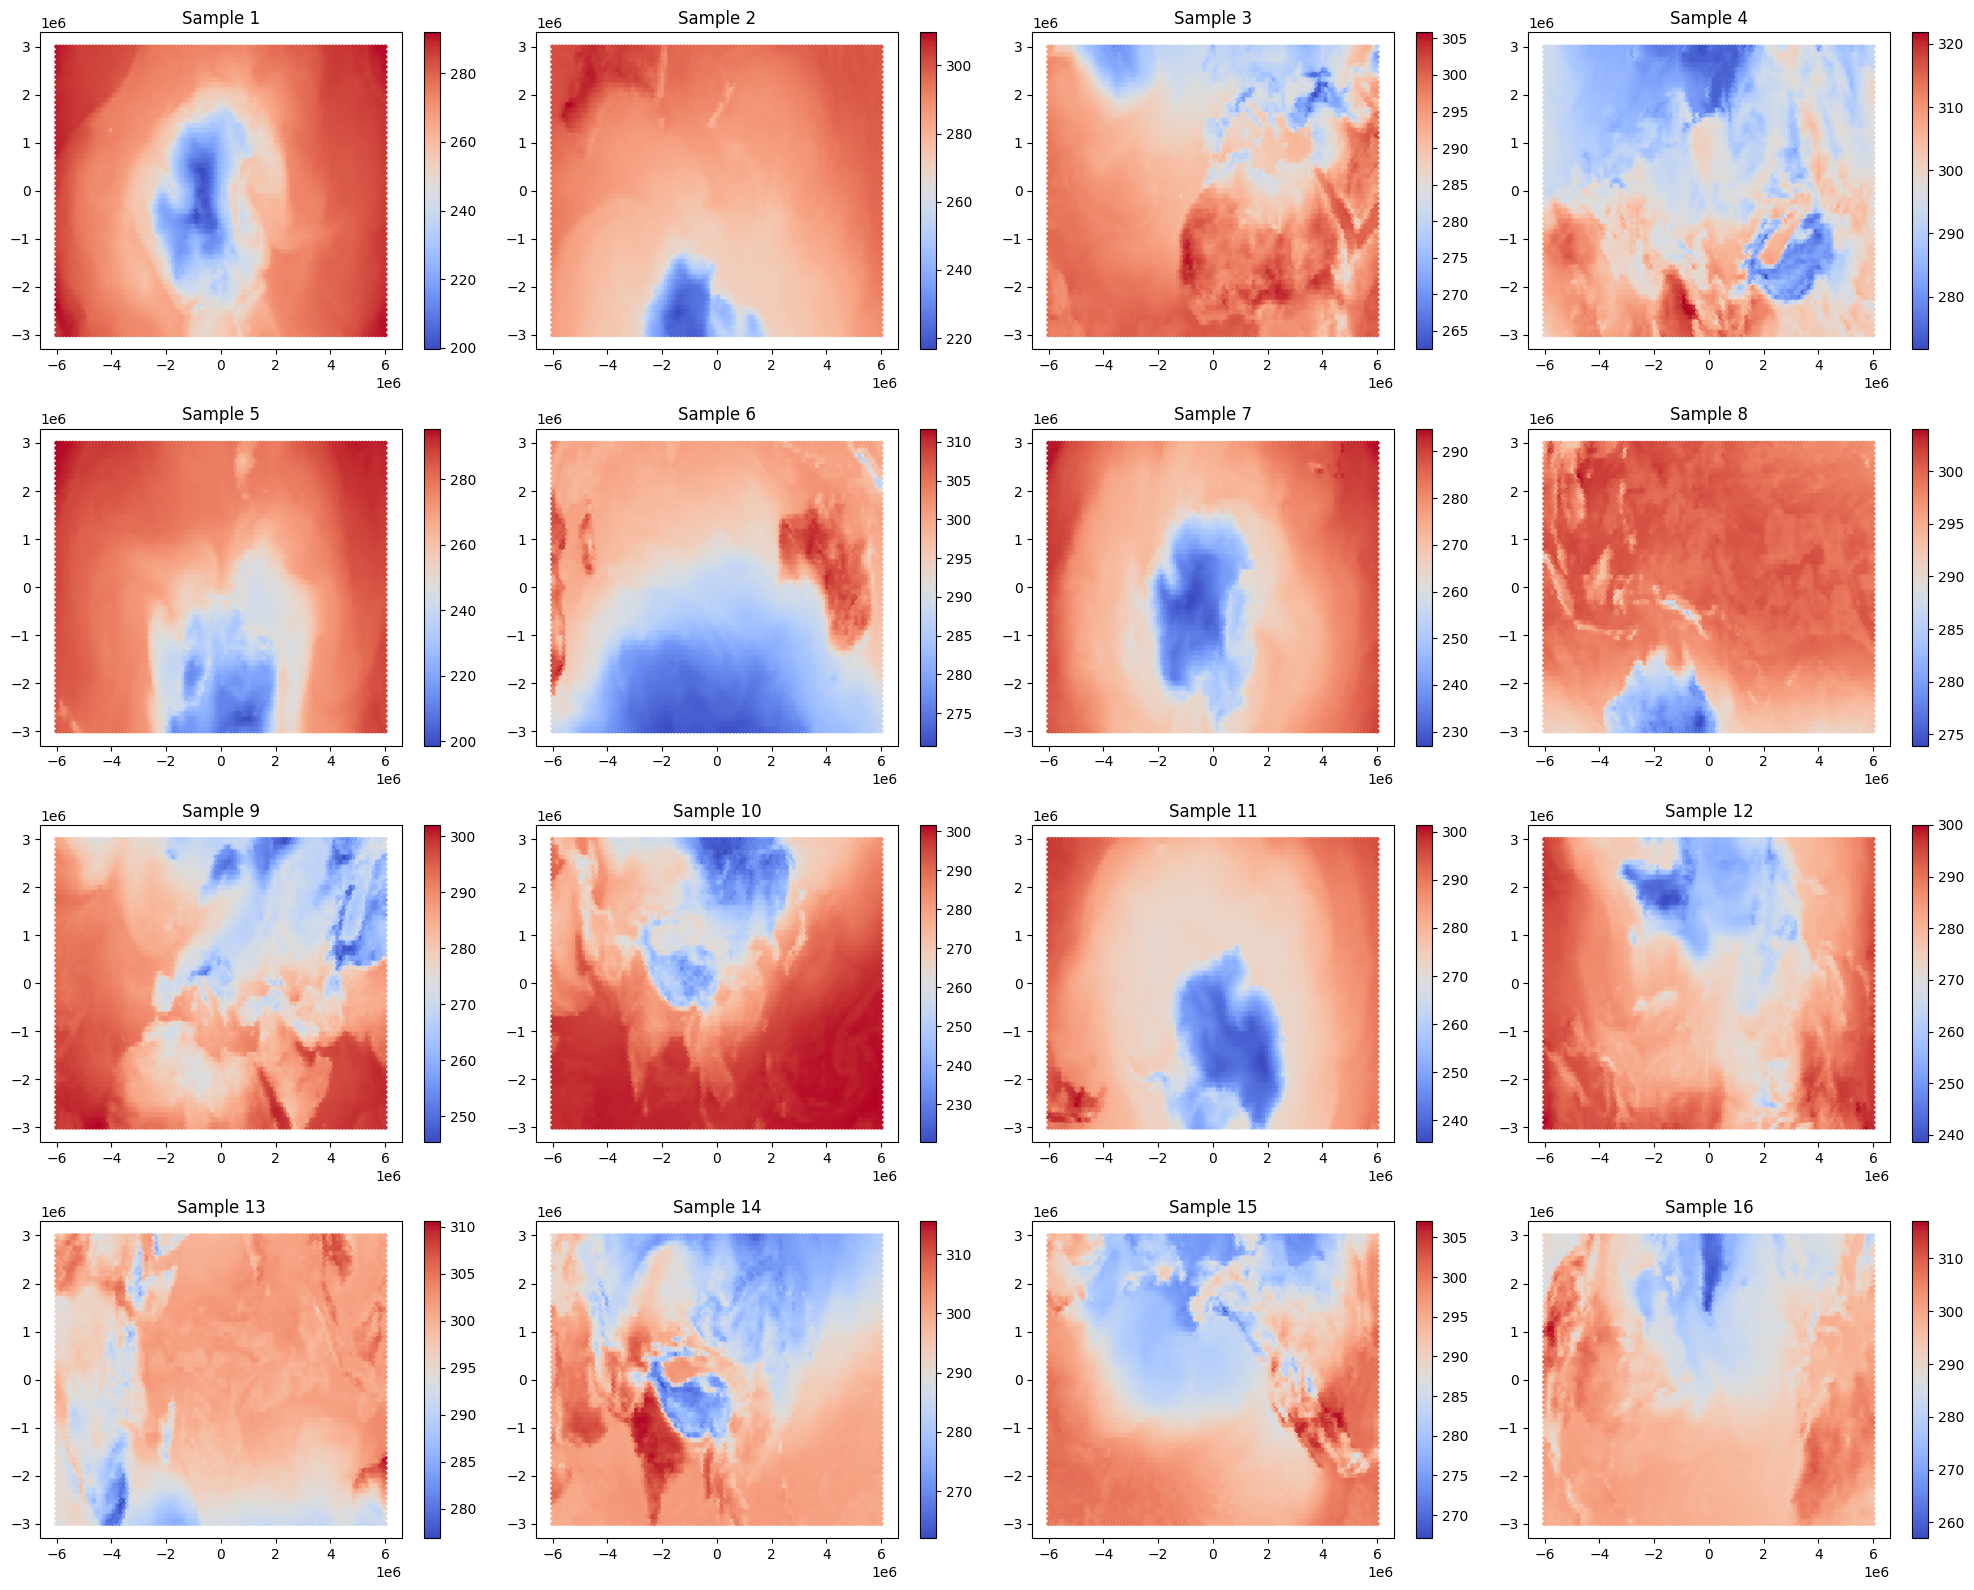

In [433]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(16):
    x, y, time, temp, _, _, _ = dset_temp[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x, y, C=temp, gridsize=100, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


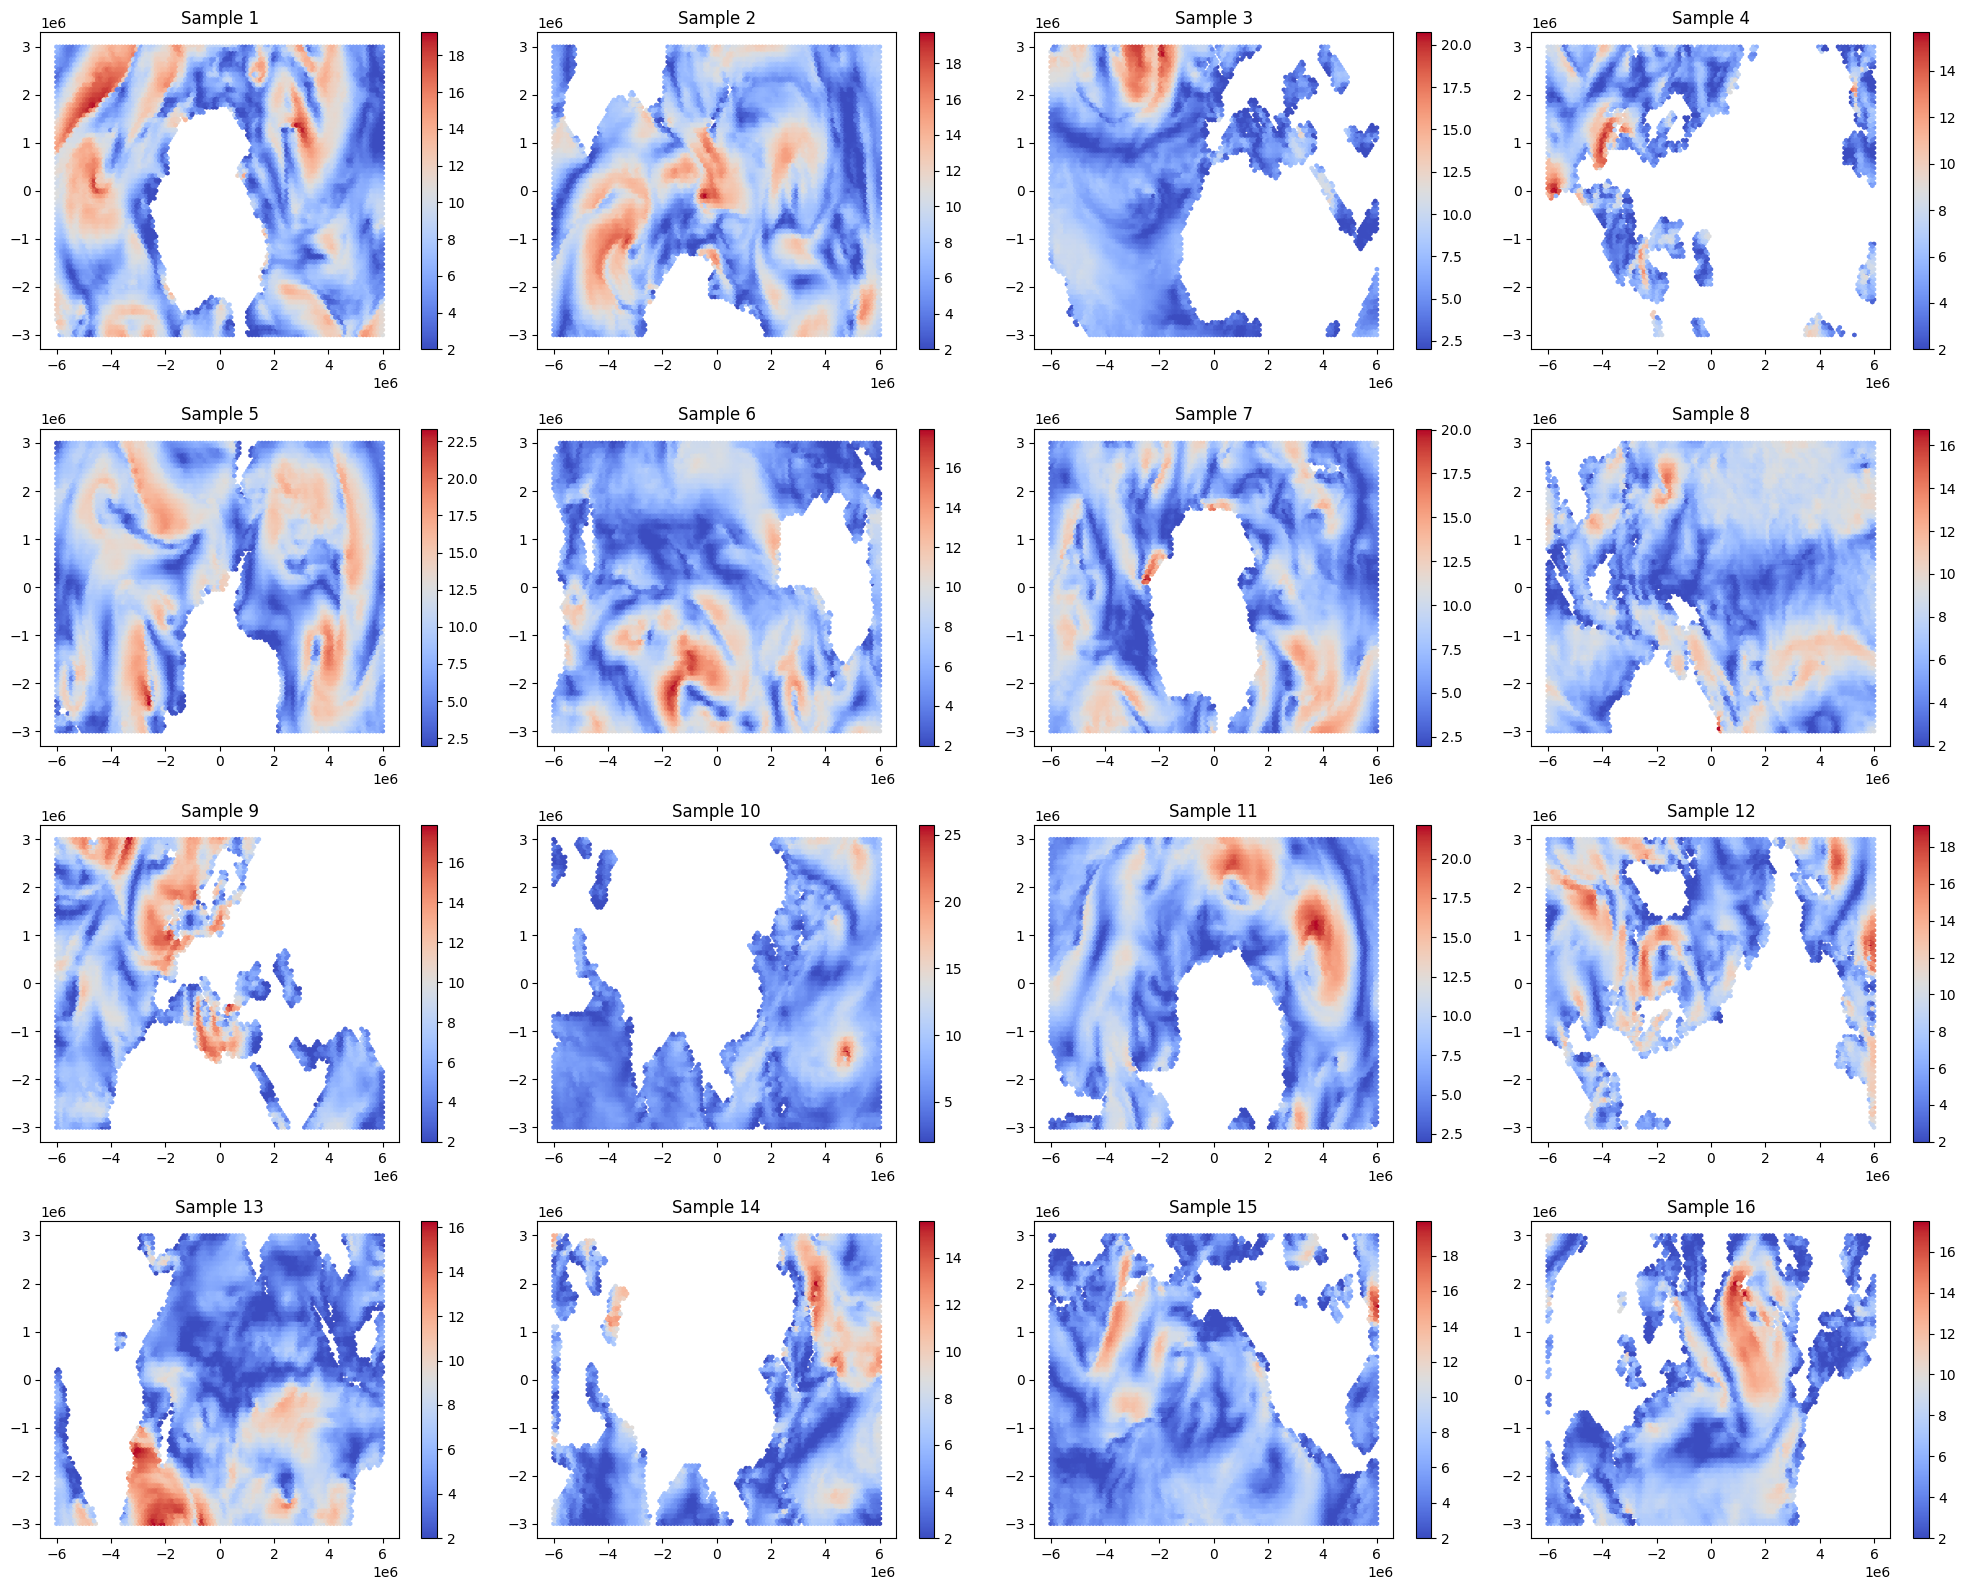

In [434]:
import matplotlib.pyplot as plt
# Plotting code
fig, ax = plt.subplots(4, 4, figsize=(20, 16))

for i in range(16):
    x, y, time, wind, _, _, _ = dset_wind[i]
    coor = i // 4, i % 4
    hb = ax[coor].hexbin(x, y, C=wind, gridsize=100, cmap='coolwarm')
    cb = plt.colorbar(hb, ax=ax[coor])
    ax[coor].set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()
